In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import glob
import sys
import pandasql as pdsql
import importlib
from brokenaxes import brokenaxes

sys.path.append("..")
import analysislib as alib
importlib.reload(alib)

# ABOVE ZNONEOFTHE

sq = lambda q: pdsql.sqldf(q, globals())
sqflat = lambda q: alib.flatten(pdsql.sqldf(q, globals()).values.tolist())

# O1 - compressibility

In [3]:
df = pd.read_csv("../../data-raven3/2025-10-05-time-18-05-24-compressibile-question-mark/master.csv")

In [3]:
sq("SELECT * FROM df LIMIT 5")

,Unnamed: 0,cbSize,cioengine,ciodepth,crw,cnproc,cdevice,cdirect,cmemlim,cfile,...,diskutil-TOTAL_WRITES(KB),diskutil-TOTAL_READS(MB),diskutil-TOTAL_WRITES(MB),diskutil-TOTAL_READS(GB),diskutil-TOTAL_WRITES(GB),diskutil-rMB/s,diskutil-wMB/s,diskutil-AVGRQ-SZ,diskutil-AVGQU-SZ,diskutil-DEV_UTIL
0,0,65536,sync,1,read,1,ssd,1,none,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,65536,sync,1,read,1,zram-lzo,1,none,none,...,4194632.0,4096.0,4096.0,4.0,4.0,1.01500,684.427,2.23333,0.241667,23.1250
2,2,65536,sync,1,read,1,zram-zstd,1,none,none,...,4194656.0,4096.0,4096.0,4.0,4.0,167.54100,256.707,4.85062,0.691875,68.8094
3,3,65536,sync,1,read,1,zram-lz4,1,none,none,...,4194920.0,4096.0,4096.0,4.0,4.0,1.01833,684.408,2.22833,0.271667,26.2967
4,4,65536,sync,1,read,1,ssd,1,none,none,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.columns

Index(['Unnamed: 0', 'cbSize', 'cioengine', 'ciodepth', 'crw', 'cnproc',
       'cdevice', 'cdirect', 'cmemlim', 'cfile', 'cbuffer_compress_percentage',
       'cbuffer_compress_chunk', 'readBW_bytes', 'readBW', 'writeBW_bytes',
       'writeBW', 'avgreadlat_ns', 'avgreadlat', 'avgwritelat_ns',
       'avgwritelat', 'USR_UTIL_perc', 'SYS_UTIL_perc', 'IOW_UTIL_perc',
       'IDL_UTIL_perc', 'CPU_UTIL_perc', 'diskutil-TOTAL_READS(KB)',
       'diskutil-TOTAL_WRITES(KB)', 'diskutil-TOTAL_READS(MB)',
       'diskutil-TOTAL_WRITES(MB)', 'diskutil-TOTAL_READS(GB)',
       'diskutil-TOTAL_WRITES(GB)', 'diskutil-rMB/s', 'diskutil-wMB/s',
       'diskutil-AVGRQ-SZ', 'diskutil-AVGQU-SZ', 'diskutil-DEV_UTIL'],
      dtype='object')

In [4]:
sq("""SELECT cdevice, cbuffer_compress_percentage, readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df
              WHERE crw='read' AND cdevice='zram-lzo'
              ORDER BY cdevice, cbuffer_compress_percentage"""), 

(     cdevice  cbuffer_compress_percentage  readBW_GB
 0   zram-lzo                            0   7.504690
 1   zram-lzo                           10   7.326007
 2   zram-lzo                           20   4.237288
 3   zram-lzo                           30   3.524229
 4   zram-lzo                           40   3.358522
 5   zram-lzo                           50   3.122560
 6   zram-lzo                           60   2.844950
 7   zram-lzo                           70   5.420054
 8   zram-lzo                           80   5.340454
 9   zram-lzo                           90   4.102564
 10  zram-lzo                          100  12.232416,)

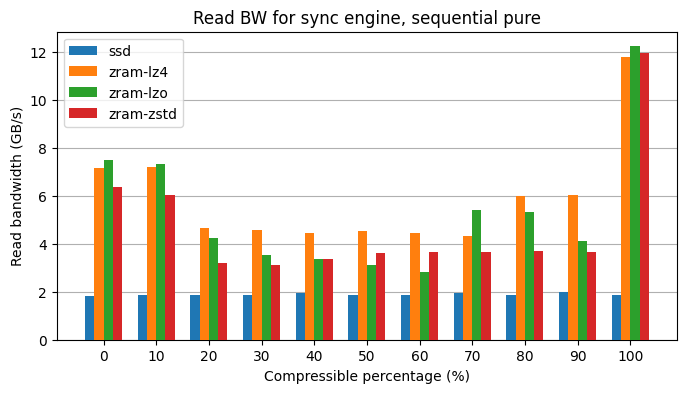

In [48]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT cbuffer_compress_percentage FROM df ORDER BY cbuffer_compress_percentage"), 
    sqflat("""SELECT readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df
              WHERE crw='read'
              ORDER BY cdevice, cbuffer_compress_percentage"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df ORDER BY cdevice"),
    xlabel="Compressible percentage (%)",
    ylabel="Read bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O1-readBW.png", bbox_inches="tight")
plt.title("Read BW for sync engine, sequential pure")
plt.show()

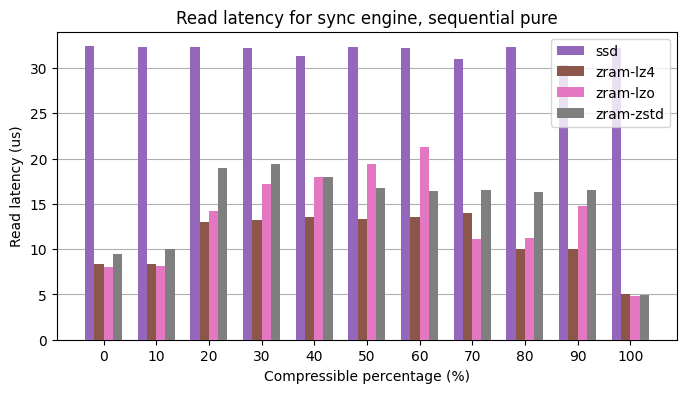

In [5]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT cbuffer_compress_percentage FROM df ORDER BY cbuffer_compress_percentage"), 
    sqflat("""SELECT avgreadlat_ns/(1000.0) AS readlat_us
              FROM df
              WHERE crw='read'
              ORDER BY cdevice, cbuffer_compress_percentage"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df ORDER BY cdevice"),
    colors=["#9467bd", "#8c564b", '#e377c2', '#7f7f7f'],
    xlabel="Compressible percentage (%)",
    ylabel="Read latency (us)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O1-readlat.png", bbox_inches="tight")
plt.title("Read latency for sync engine, sequential pure")
plt.show()

C:\Users\adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\brokenaxes.py:344: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))
C:\Users\adnan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\brokenaxes.py:344: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  result.append(getattr(ax, method)(*args, **kwargs))


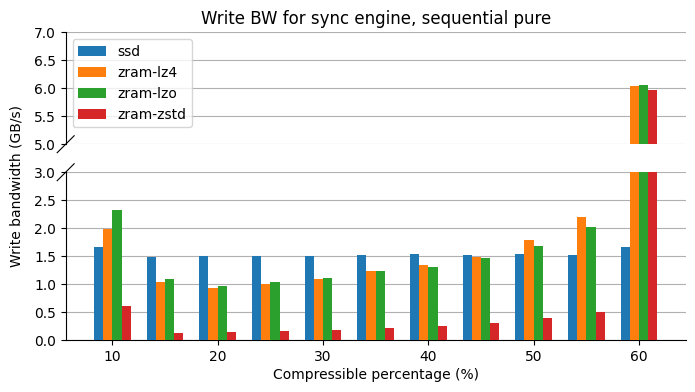

In [17]:
plt.figure(figsize=(8, 4))

bax = brokenaxes(ylims=((0, 3), (5, 7))) 
                 
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT cbuffer_compress_percentage FROM df ORDER BY cbuffer_compress_percentage"), 
    sqflat("""SELECT writeBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df
              WHERE crw='write'
              ORDER BY cdevice, cbuffer_compress_percentage"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df ORDER BY cdevice"),
    xlabel="Compressible percentage (%)",
    ylabel="Write bandwidth (GB/s)",
    show=False,
    # create_new_figure=False,
    figsize=[8, 4],
    ax=bax
)

bax.legend(loc="upper left")
bax.set_xlabel("Compressible percentage (%)", labelpad=20)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O1-writeBW.png", bbox_inches="tight")
plt.title("Write BW for sync engine, sequential pure")
plt.show()

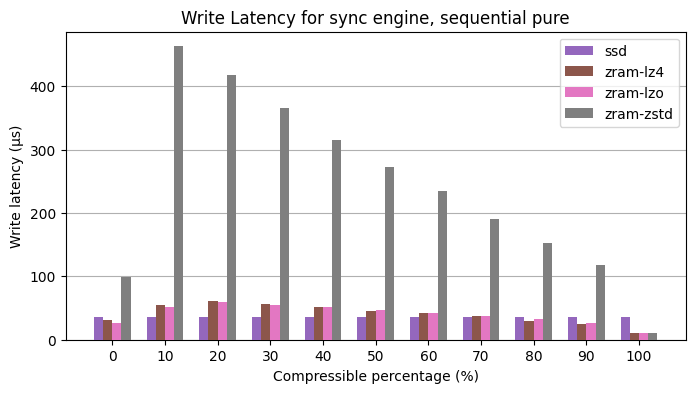

In [16]:
# write latency
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT cbuffer_compress_percentage FROM df ORDER BY cbuffer_compress_percentage"), 
    sqflat("""SELECT avgwritelat_ns/(1000.0) AS writelat_us
              FROM df
              WHERE crw='write'
              ORDER BY cdevice, cbuffer_compress_percentage"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df ORDER BY cdevice"),
    colors=["#9467bd", "#8c564b", '#e377c2', '#7f7f7f'],
    xlabel="Compressible percentage (%)",
    ylabel="Write latency (µs)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O1-writelat.png", bbox_inches="tight")
plt.title("Write Latency for sync engine, sequential pure")
plt.show()

# O2 - async

In [11]:
df2 = pd.read_csv("../../data-raven3/2025-10-05-time-18-59-39-async-perf/master.csv")

In [12]:
df2.columns

Index(['Unnamed: 0', 'cbSize', 'cioengine', 'ciodepth', 'crw', 'cnproc',
       'cdevice', 'cdirect', 'cmemlim', 'cfile', 'cbuffer_compress_percentage',
       'cbuffer_compress_chunk', 'readBW_bytes', 'readBW', 'writeBW_bytes',
       'writeBW', 'avgreadlat_ns', 'avgreadlat', 'avgwritelat_ns',
       'avgwritelat', 'USR_UTIL_perc', 'SYS_UTIL_perc', 'IOW_UTIL_perc',
       'IDL_UTIL_perc', 'CPU_UTIL_perc', 'diskutil-TOTAL_READS(KB)',
       'diskutil-TOTAL_WRITES(KB)', 'diskutil-TOTAL_READS(MB)',
       'diskutil-TOTAL_WRITES(MB)', 'diskutil-TOTAL_READS(GB)',
       'diskutil-TOTAL_WRITES(GB)', 'diskutil-rMB/s', 'diskutil-wMB/s',
       'diskutil-AVGRQ-SZ', 'diskutil-AVGQU-SZ', 'diskutil-DEV_UTIL'],
      dtype='object')

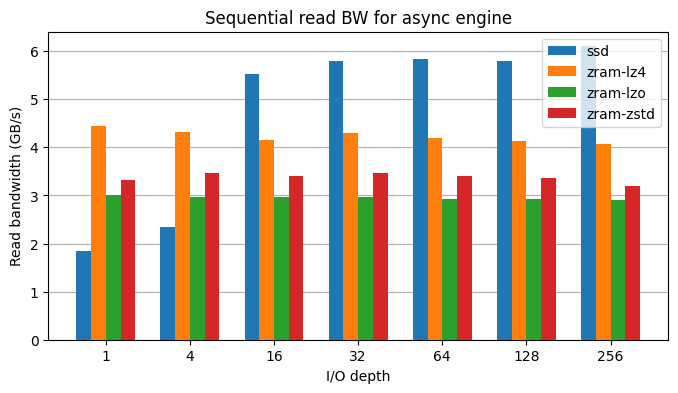

In [43]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT ciodepth FROM df2 ORDER BY ciodepth"), 
    sqflat("""SELECT readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df2
              WHERE crw='read'
              ORDER BY cdevice, ciodepth"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df2 ORDER BY cdevice"),
    xlabel="I/O depth",
    ylabel="Read bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O2-seqreadBW.png", bbox_inches="tight")
plt.title("Sequential read BW for async engine")
plt.show()

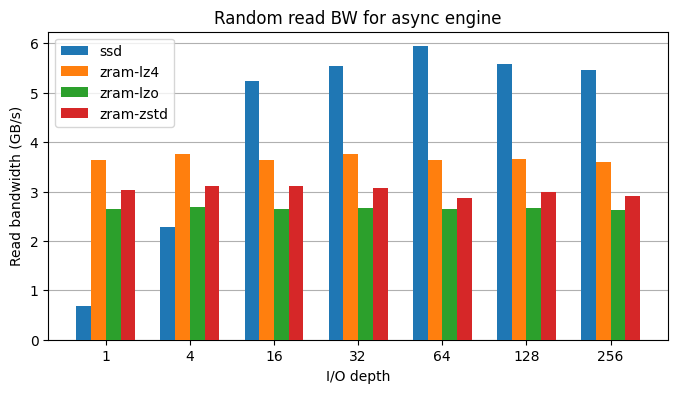

In [20]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT ciodepth FROM df2 ORDER BY ciodepth"), 
    sqflat("""SELECT readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df2
              WHERE crw='randread'
              ORDER BY cdevice, ciodepth"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df2 ORDER BY cdevice"),
    xlabel="I/O depth",
    ylabel="Read bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O2-randreadBW.png", bbox_inches="tight")
plt.title("Random read BW for async engine")
plt.show()

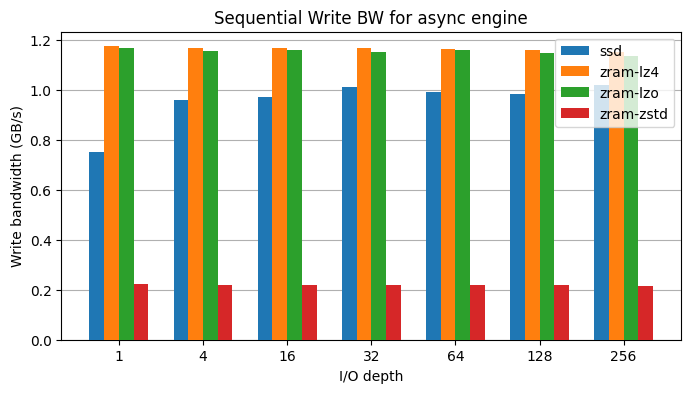

In [21]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT ciodepth FROM df2 ORDER BY ciodepth"), 
    sqflat("""SELECT writeBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df2
              WHERE crw='write'
              ORDER BY cdevice, ciodepth"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df2 ORDER BY cdevice"),
    xlabel="I/O depth",
    ylabel="Write bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O2-seqwriteBW.png", bbox_inches="tight")
plt.title("Sequential Write BW for async engine")
plt.show()

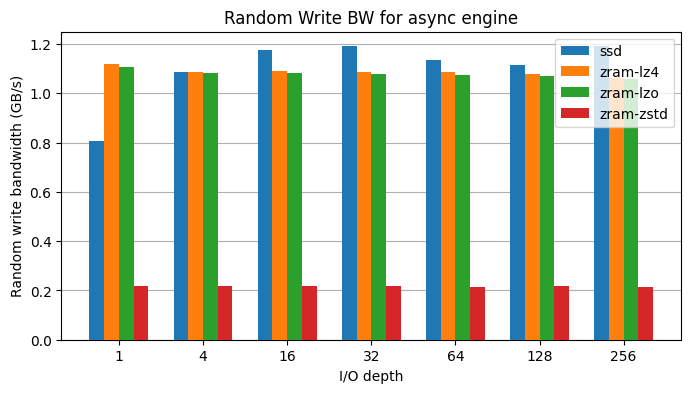

In [22]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT ciodepth FROM df2 ORDER BY ciodepth"), 
    sqflat("""SELECT writeBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df2
              WHERE crw='randwrite'
              ORDER BY cdevice, ciodepth"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df2 ORDER BY cdevice"),
    xlabel="I/O depth",
    ylabel="Random write bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O2-randwriteBW.png", bbox_inches="tight")
plt.title("Random Write BW for async engine")
plt.show()

# O3 - block size scaling

In [23]:
df3 = pd.read_csv("../../data-raven3/2025-10-06-time-16-45-51-block-sizes-scaling/master.csv")

In [37]:
df3['cbSize'] = df3['cbSize'].apply(alib.unformat_size_1)

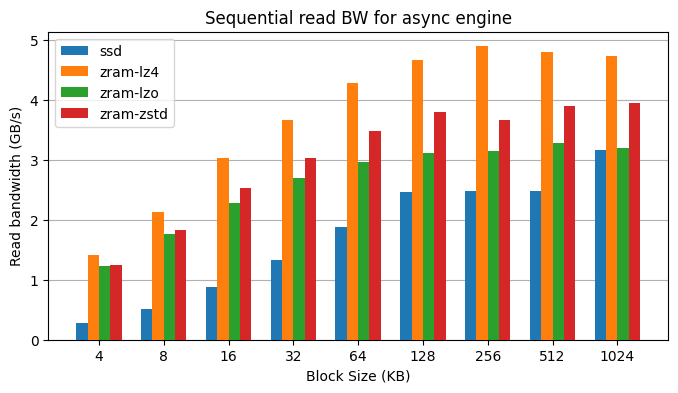

In [44]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT CAST(cbSize/1024 AS int) FROM df3 ORDER BY cbSize"), 
    sqflat("""SELECT readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df3
              WHERE crw='read'
              ORDER BY cdevice, cbSize"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df3 ORDER BY cdevice"),
    xlabel="Block Size (KB)",
    ylabel="Read bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O3-seqreadBW.png", bbox_inches="tight")
plt.title("Sequential read BW for async engine")
plt.show()

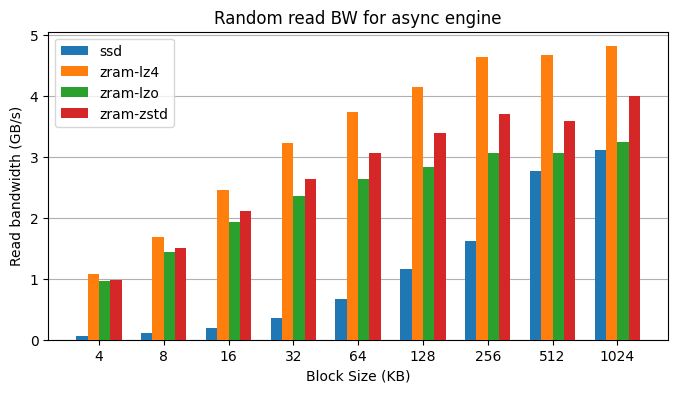

In [45]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT CAST(cbSize/1024 AS int) FROM df3 ORDER BY cbSize"), 
    sqflat("""SELECT readBW_bytes/(1024.0*1024.0*1024.0) AS readBW_GB 
              FROM df3
              WHERE crw='randread'
              ORDER BY cdevice, cbSize"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df3 ORDER BY cdevice"),
    xlabel="Block Size (KB)",
    ylabel="Read bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O3-randreadBW.png", bbox_inches="tight")
plt.title("Random read BW for async engine")
plt.show()

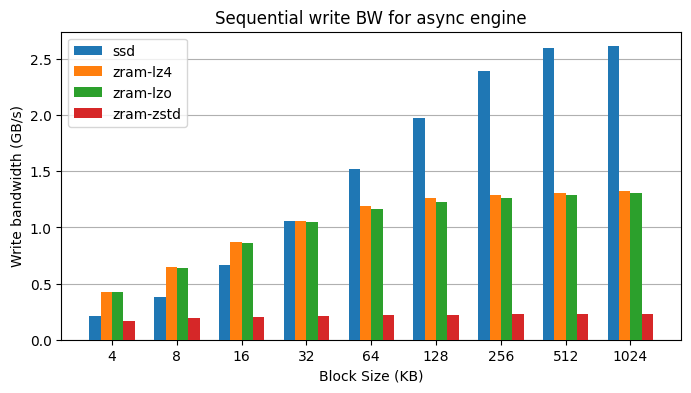

In [47]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT CAST(cbSize/1024 AS int) FROM df3 ORDER BY cbSize"), 
    sqflat("""SELECT writeBW_bytes/(1024.0*1024.0*1024.0) AS writeBW_GB 
              FROM df3
              WHERE crw='write'
              ORDER BY cdevice, cbSize"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df3 ORDER BY cdevice"),
    xlabel="Block Size (KB)",
    ylabel="Write bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O3-seqwriteBW.png", bbox_inches="tight")
plt.title("Sequential write BW for async engine")
plt.show()

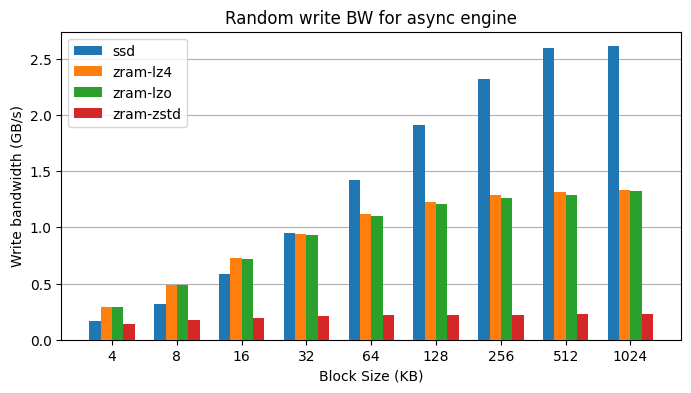

In [48]:
alib.grouped_barplot_flat(
    sqflat("SELECT DISTINCT CAST(cbSize/1024 AS int) FROM df3 ORDER BY cbSize"), 
    sqflat("""SELECT writeBW_bytes/(1024.0*1024.0*1024.0) AS writeBW_GB 
              FROM df3
              WHERE crw='randwrite'
              ORDER BY cdevice, cbSize"""), 
    labels=sqflat("SELECT DISTINCT cdevice FROM df3 ORDER BY cdevice"),
    xlabel="Block Size (KB)",
    ylabel="Write bandwidth (GB/s)",
    show=False
)
plt.savefig("../../processed-data/2025-10-06-final-run/A-O3-randwriteBW.png", bbox_inches="tight")
plt.title("Random write BW for async engine")
plt.show()

In [50]:
sq("""SELECT cdevice, cbSize, writeBW_bytes/(1024.0*1024.0*1024.0) AS writeBW_GB 
      FROM df3
      WHERE crw='randwrite' AND cdevice='zram-zstd'
      ORDER BY cdevice, cbSize
   """), 

(     cdevice     cbSize  writeBW_GB
 0  zram-zstd     4096.0    0.136059
 1  zram-zstd     8192.0    0.171094
 2  zram-zstd    16384.0    0.194690
 3  zram-zstd    32768.0    0.209421
 4  zram-zstd    65536.0    0.217776
 5  zram-zstd   131072.0    0.222154
 6  zram-zstd   262144.0    0.223967
 7  zram-zstd   524288.0    0.225635
 8  zram-zstd  1048576.0    0.226761,)